In [30]:
from matplotlib import pyplot as plt
import numpy as np

# Files to load. t = nzm_timesteps, l = lut_depth, s = samples, w = reward weights
files = [
    #"lut_t=1_l=1_s=1_w=1",
    "lut_t=2_l=1_s=1_w=11", # best one (short term)
    #"lut_t=2_l=2_s=1_w=01",
    #"lut_t=2_l=2_s=1_w=11",
    #"lut_t=3_l=3_s=1_w=001",
    #"lut_t=3_l=3_s=1_w=111",
    #"lut_t=4_l=3_s=1_w=0001",
    #"lut_t=4_l=3_s=1_w=0011",
    #"lut_t=4_l=3_s=1_w=0001",
    #"lut_t=4_l=4_s=1_w=0001",
    #"lut_t=4_l=4_s=1_w=1111",
    "lut_t=5_l=3_s=0_w=11111_i=10k",
    "lut_t=5_l=3_s=0_w=11111",
    "lut_t=5_l=3_s=1_w=11111",
    "lut_t=5_l=3_s=2_w=11111",
    "lut_t=5_l=3_s=3_w=11111",
    "lut_t=5_l=3_s=4_w=11111",
    "lut_t=5_l=4_s=0_w=11111",
    #"rnn_t=1_s=1_w=1",
    #"rnn_t=2_s=1_w=11",
    #"rnn_t=2_s=1_w=01",
    #"rnn_t=3_s=1_w=001",
    #"rnn_t=3_s=1_w=111",
    #"rnn_t=4_s=1_w=0001", # best one long term
    #"rnn_t=4_s=1_w=1111",
]

num_timesteps = 200

fidelities_each = []
for file in files:
    data = np.load(f"{file}.npz")
    fidelities_each.append(data)

fidelities_no_feedback = np.load("fidelities_no_feedback.npz")["fidelities"][:num_timesteps+1]

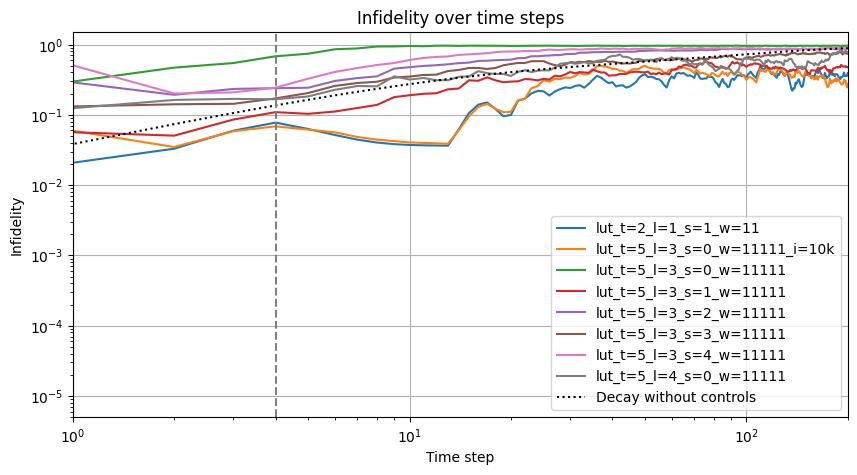

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
for file, fidelities in zip(files, fidelities_each):
    color = None
    if "lut" in file:
        linestyle = "-"
        F = fidelities["fidelities_lut"][:num_timesteps+1]
    else:
        linestyle = "--"
        F = fidelities["fidelities_rnn"][:num_timesteps+1]

    label = file
    ax.plot(np.arange(len(1 - F)), 1 - F, label=f"{label}", linestyle=linestyle)


ax.plot(np.arange(len(1 - fidelities_no_feedback)), 1 - fidelities_no_feedback, label="Decay without controls", color="black", linestyle=":")
ax.axvline(x=4, color="gray", linestyle="--")
ax.set_xlabel("Time step")
ax.set_ylabel("Infidelity")
ax.set_title("Infidelity over time steps")
ax.legend(loc="lower right")
ax.grid()
ax.set_xscale("log")
ax.set_yscale("log")
#ax.set_xlim(1,200)
ax.set_ylim(0.5e-5,1.5)

fig.savefig("fidelity_comparison.png", dpi=300)